<a href="https://colab.research.google.com/github/akbarehsani/backsample2/blob/master/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RuntimeError: ignored

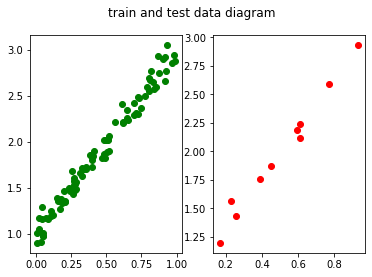

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

torch.random.manual_seed(42)
x=torch.rand(100,1,device=torch.device('cuda:0'))
y=1+2*x+.1*torch.randn(100,1,device=torch.device('cuda:0'))

idx=torch.randperm(100)
train_idx,val_idx=idx[:90],idx[90:]
train_x,train_y=x[train_idx],y[train_idx]
val_x,val_y=x[val_idx],y[val_idx]
a=torch.rand(1,device=torch.device('cuda:0'))
b=torch.rand(1,device=torch.device('cuda:0'))

fig,(ax1,ax2)=plt.subplots(1,2)
fig.align_xlabels="x"
fig.align_ylabels="y"
fig.suptitle("train and test data diagram")
ax1.plot(train_x.to('cpu'),train_y.to('cpu'),'go')
ax2.plot(val_x.to('cpu'),val_y.to('cpu'),'ro')
# print(train_x)
y=a+b*train_x
lr=1e-1
optimizer=torch.optim.SGD([a,b],lr=lr)
n_epoches=1000
for epoch in range(n_epoches):
  yhat=a+b*train_x
  error=train_y-yhat
  loss=(error**2).mean()
  # a_grad=-2*error.mean()
  # b_grad=-2*(train_x*error).mean()
  # a=a-lr*a_grad
  # b=b-lr*b_grad
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
print('final a:',a,'final b:',b)

